In [12]:
# -----------------------------------------------------------
# HEART DISEASE PREDICTION USING MACHINE LEARNING
# -----------------------------------------------------------

# STEP 1: Import Libraries
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# -----------------------------------------------------------
# STEP 2: Load Dataset
# Using a cleaned public version of UCI Heart Disease dataset
# -----------------------------------------------------------
df = pd.read_csv("heart_cleveland_upload.csv")

print("Dataset Loaded Successfully!")
df.describe()


Dataset Loaded Successfully!


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB


In [14]:
#pre-processing we have only seen any missing vaues presnt in the dataset 
# there are no missing the dataset so we are not applying any data-handling 
df.isnull().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
condition    0
dtype: int64

In [15]:
df.drop(["age","sex"],axis=1)
#Feature extraction : in this we are extraccting the features, we only keep neccesary features 

,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,0,160,234,1,2,131,0,0.1,1,1,0,0
1,0,140,239,0,0,151,0,1.8,0,2,0,0
2,0,150,226,0,0,114,0,2.6,2,0,0,0
3,0,138,282,1,2,174,0,1.4,1,1,0,1
4,0,110,211,0,2,144,1,1.8,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
292,3,152,223,0,0,181,0,0.0,0,0,2,1
293,3,118,219,0,0,140,0,1.2,1,0,2,1
294,3,120,198,0,0,130,1,1.6,1,0,2,1
295,3,138,183,0,0,182,0,1.4,0,0,0,0


In [16]:
X =df.drop("condition", axis=1)
y =df["condition"]
y.head()
#defing the features(X) and target(Y)

0    0
1    0
2    0
3    1
4    0
Name: condition, dtype: int64

In [17]:
from sklearn.model_selection import train_test_split

# 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42
)

# Show shapes
X_train.shape, X_test.shape, y_train.shape, y_test.shape
#datasplit : we are doing dataset to train our model and that split will bw in 80 percent for train and 20 percent for testing 

((237, 13), (60, 13), (237,), (60,))

In [18]:
from sklearn.preprocessing import StandardScaler

# Create scaler object
scaler = StandardScaler()

# Fit on training data and transform
X_train_scaled = scaler.fit_transform(X_train)

# Only transform test data (do NOT fit again)
X_test_scaled = scaler.transform(X_test)

X_train_scaled[:5]   # show first 5 scaled rows
# Feature scaling we are going to convert the data into ml understandable way . we are going to scale F to have mean = 0 and std = 1

array([[-0.90725997,  0.68705872,  0.86597571,  0.56240882,  1.18738851,
        -0.40925259, -0.9958619 , -1.2493456 ,  1.42774701,  0.6862996 ,
         0.6667651 ,  1.43121323,  1.22587929],
       [-0.34876487, -1.45547966,  0.86597571, -0.03450515,  1.0758797 ,
        -0.40925259, -0.9958619 , -0.30990401,  1.42774701,  0.1652542 ,
         0.6667651 , -0.70883431,  1.22587929],
       [ 0.54482729,  0.68705872, -1.20711765,  0.56240882, -0.4852437 ,
        -0.40925259, -0.9958619 ,  0.62953757,  1.42774701, -0.87683659,
        -0.96234138, -0.70883431, -0.85679735],
       [-2.24764821,  0.68705872, -2.24366433, -0.75080192, -1.21005099,
        -0.40925259,  1.02139682,  1.05655648, -0.7004042 , -0.87683659,
        -0.96234138, -0.70883431, -0.85679735],
       [-1.01895899,  0.68705872,  0.86597571,  0.68179161,  1.15021891,
        -0.40925259,  1.02139682, -0.09639456,  1.42774701, -0.87683659,
         0.6667651 ,  2.501237  ,  1.22587929]])

In [19]:
# Train Logistic Regression model
log_reg = LogisticRegression()

# Fit model using the scaled training data
log_reg.fit(X_train_scaled, y_train)

# Predict using test data
y_pred = log_reg.predict(X_test_scaled)

# Check accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Logistic Regression Accuracy:", accuracy)


Logistic Regression Accuracy: 0.7333333333333333


In [20]:
from sklearn.ensemble import RandomForestClassifier

# Create model
rf = RandomForestClassifier(random_state=42)

# Train
rf.fit(X_train, y_train)

# Predict
rf_pred = rf.predict(X_test)

# Accuracy
rf_accuracy = accuracy_score(y_test, rf_pred)
print("Random Forest Accuracy:", rf_accuracy)



Random Forest Accuracy: 0.7


Logistic Regression Accuracy: 0.7333333333333333
Confusion Matrix:
 [[23  9]
 [ 7 21]]


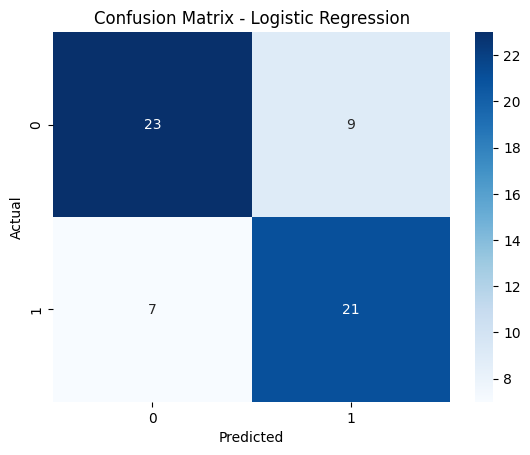

              precision    recall  f1-score   support

           0       0.77      0.72      0.74        32
           1       0.70      0.75      0.72        28

    accuracy                           0.73        60
   macro avg       0.73      0.73      0.73        60
weighted avg       0.74      0.73      0.73        60



In [21]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Logistic Regression Accuracy:", accuracy)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Heatmap for better visualization
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Classification Report
print(classification_report(y_test, y_pred))


In [23]:
# -----------------------------------------------------------
# SAMPLE PATIENT INPUT FOR PREDICTION
# -----------------------------------------------------------

# Enter sample patient values (modify these as needed)
sample = {
    "age": 65,
    "sex": 1,
    "cp": 0,
    "trestbps": 150,
    "chol": 226,
    "fbs": 0,
    "restecg": 0,
    "thalach": 14,
    "exang": 0,
    "oldpeak": 2.6,
    "slope": 2,
    "ca": 0,
    "thal": 0
}

# Convert to DataFrame
sample_df = pd.DataFrame([sample])

# IMPORTANT: apply same scaling used during training
sample_scaled = scaler.transform(sample_df)

# Predict using Logistic Regression
result = log_reg.predict(sample_scaled)[0]

# Display result
if result == 1:
    print("Prediction: Heart Disease Present (1)")
else:
    print("Prediction: No Heart Disease (0)")



Prediction: Heart Disease Present (1)
